<a href="https://www.kaggle.com/code/virendrakumarict/banana-quality-parameter-tuning-cv-acc-1?scriptVersionId=208798106" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/banana-quality-dataset/banana_quality_dataset.csv


# **Import the necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import**

In [3]:
df = pd.read_csv('/kaggle/input/banana-quality-dataset/banana_quality_dataset.csv')

# Display the first few rows of the dataset
df.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7


**Some inferences from the data:**

1. Target variable is column name length_cm
2. Categorical Columns
These are non-numeric features that require encoding for machine learning:
* variety
* region
* quality_category
* ripeness_category

# **Exploratory Data Analysis**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sample_id           1000 non-null   int64  
 1   variety             1000 non-null   object 
 2   region              1000 non-null   object 
 3   quality_score       1000 non-null   float64
 4   quality_category    1000 non-null   object 
 5   ripeness_index      1000 non-null   float64
 6   ripeness_category   1000 non-null   object 
 7   sugar_content_brix  1000 non-null   float64
 8   firmness_kgf        1000 non-null   float64
 9   length_cm           1000 non-null   float64
 10  weight_g            1000 non-null   float64
 11  harvest_date        1000 non-null   object 
 12  tree_age_years      1000 non-null   float64
 13  altitude_m          1000 non-null   float64
 14  rainfall_mm         1000 non-null   float64
 15  soil_nitrogen_ppm   1000 non-null   float64
dtypes: floa

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sample_id,1000.0,500.50000,288.819436,1.00,250.7500,500.500,750.2500,1000.00
quality_score,1000.0,2.46516,0.540909,0.92,2.0900,2.440,2.8500,3.89
ripeness_index,1000.0,4.04217,1.753211,1.02,2.4475,4.110,5.5625,7.00
sugar_content_brix,1000.0,18.51683,2.034812,15.00,16.8275,18.500,20.3125,21.98
firmness_kgf,1000.0,2.70684,1.289252,0.50,1.5900,2.680,3.8200,5.00
length_cm,1000.0,19.88210,5.736318,10.00,14.9025,19.890,24.8000,29.95
weight_g,1000.0,164.73893,49.163073,81.05,122.3975,163.365,205.7750,249.89
tree_age_years,1000.0,10.87960,5.215554,2.00,6.3000,10.700,15.6000,20.00
altitude_m,1000.0,723.55670,427.372855,0.40,353.9500,726.000,1071.7250,1498.40
rainfall_mm,1000.0,1972.99280,564.467912,1000.50,1498.7500,1957.400,2431.8000,2992.00


**Checking missing/null values**

In [6]:
df.isna().sum()

sample_id             0
variety               0
region                0
quality_score         0
quality_category      0
ripeness_index        0
ripeness_category     0
sugar_content_brix    0
firmness_kgf          0
length_cm             0
weight_g              0
harvest_date          0
tree_age_years        0
altitude_m            0
rainfall_mm           0
soil_nitrogen_ppm     0
dtype: int64

**There are no missing/null values hence we do not need to replace/fill any null values**

**Checking duplicate values**

In [7]:
df.duplicated().sum()

0

# **2. Modifying date and time columns**

In [8]:
df['harvest_date'] = pd.to_datetime(df['harvest_date'])

**Extracting harvesting month as seperate feature**

In [9]:
df['harvest_month'] = df['harvest_date'].dt.month

In [10]:
df.head() 

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm,harvest_month
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6,10
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8,10
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7,9
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8,10
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7,10


# **3. Data Plotting/Visualization**

**Dropping sample_id and harvest_date column and seperating numerical and categorical variables**

In [11]:
num_cols = df.select_dtypes(include = ['int64','float64']).drop(columns=['sample_id']).columns
cat_cols = df.select_dtypes(exclude = ['int64','float64']).drop(columns=['harvest_date']).columns

## 3.1 **Histograms of all numerical variables**

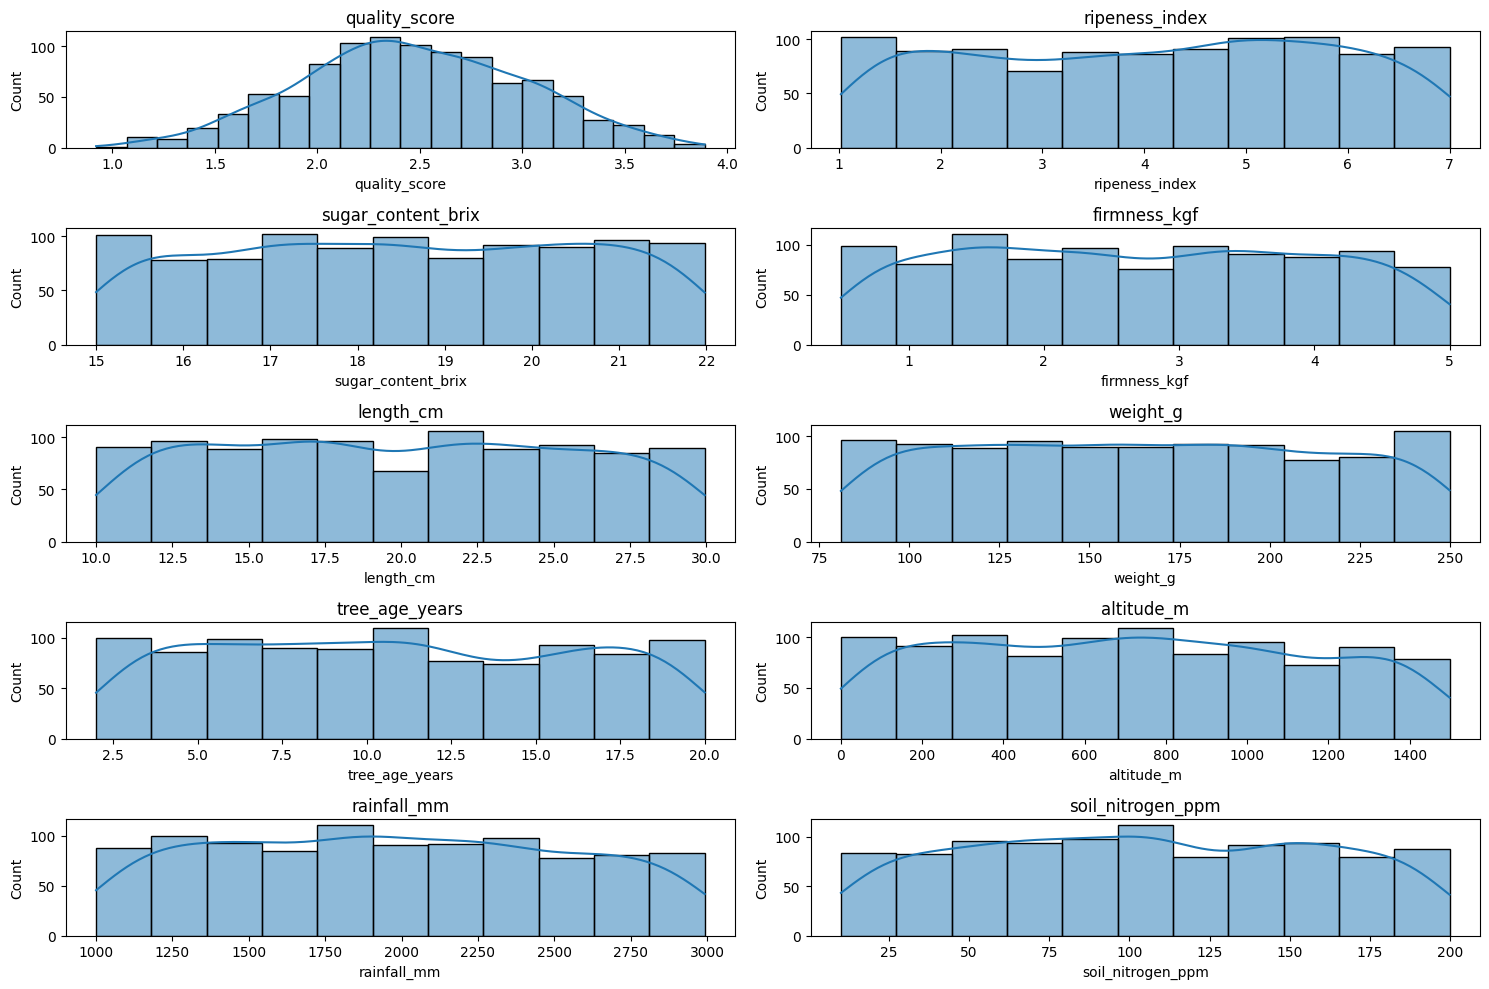

In [12]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


**Inferences from above histograms**

1. quality_score feature has a normal distribution
2. Remaining all features have more or less uniform type of distribution

## 3.2 **Boxplot for checking outliers**

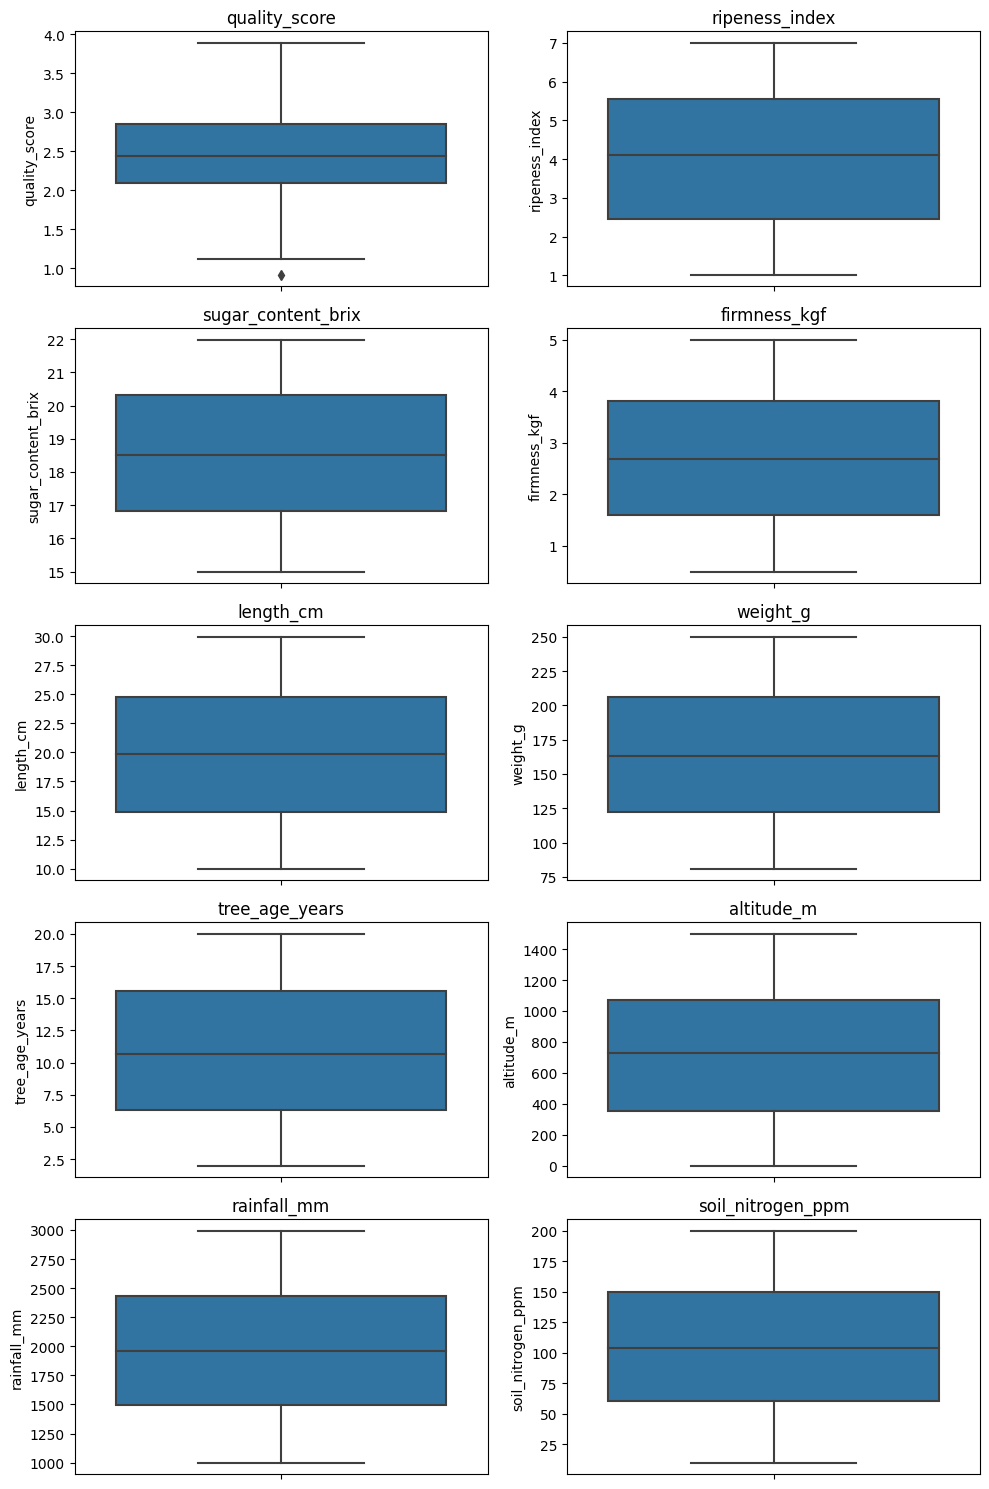

In [13]:
f, ax = plt.subplots(5,2 , figsize=(10,15))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(data= df, y= cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

**Inferences from above boxplots**
<br>There are no potential outliers in any of the numerical features

## 3.3 **Countplot**

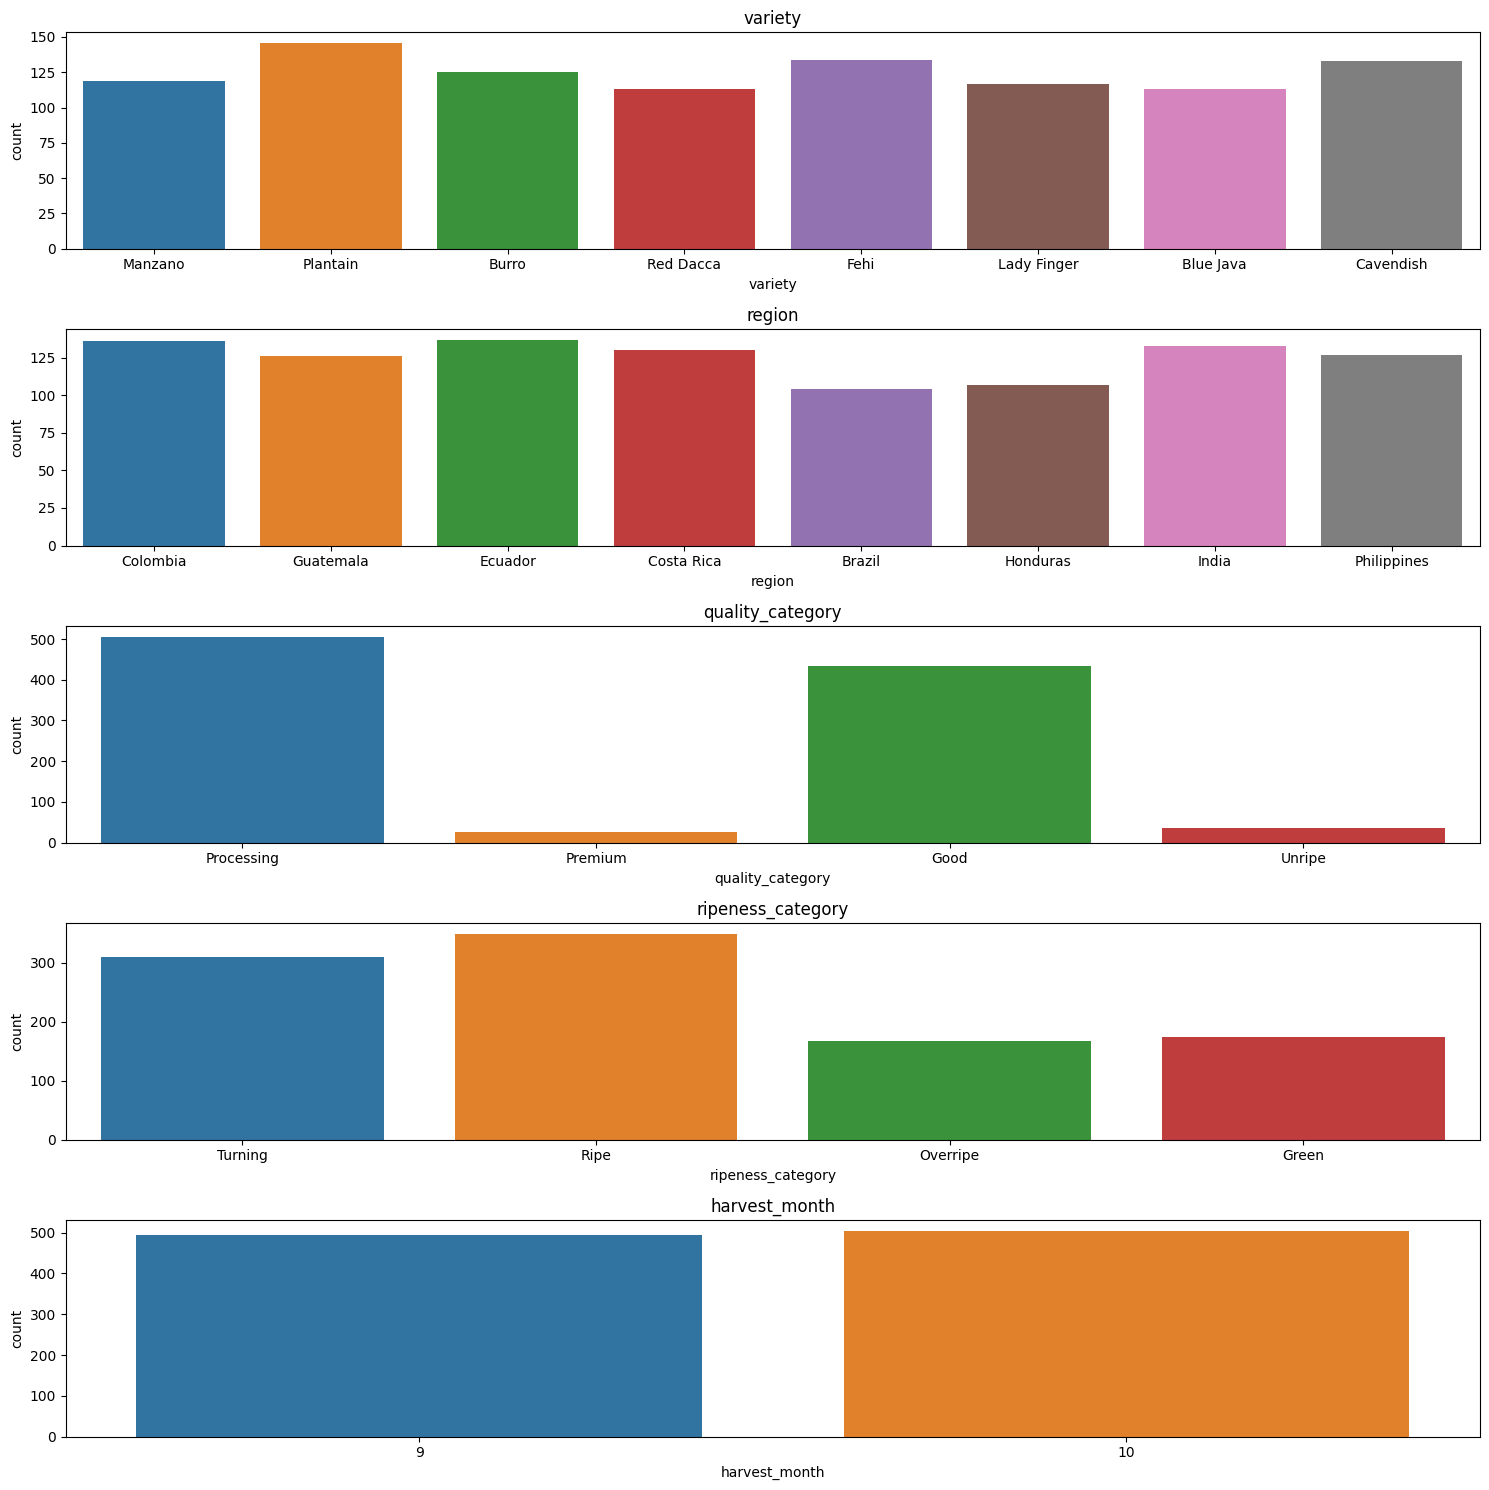

In [14]:
f, ax = plt.subplots(5,1 , figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data= df, x= cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

**Purpose of Using Countplots**

**Visualizing the Distribution of Categories:**
Countplots make it easy to understand how data is distributed across different categories of a variable.
For instance, you can quickly see which category is the most or least frequent.

**Spotting Data Imbalance:**
Helps detect imbalances in the dataset. For example, if one category dominates, it could impact machine learning models.

**Identifying Missing or Rare Categories:**
Reveals any categories with zero or very few observations, which might require special treatment during preprocessing.

**Inferences drawn from above countplots**
1. There is data imbalance in categorical variable quality_category, specifically "premium" and "unripe" subcategories have very less data as compared to others. So we need to address this data imbalance.

## 3.4 **Correlation/Heat Map**

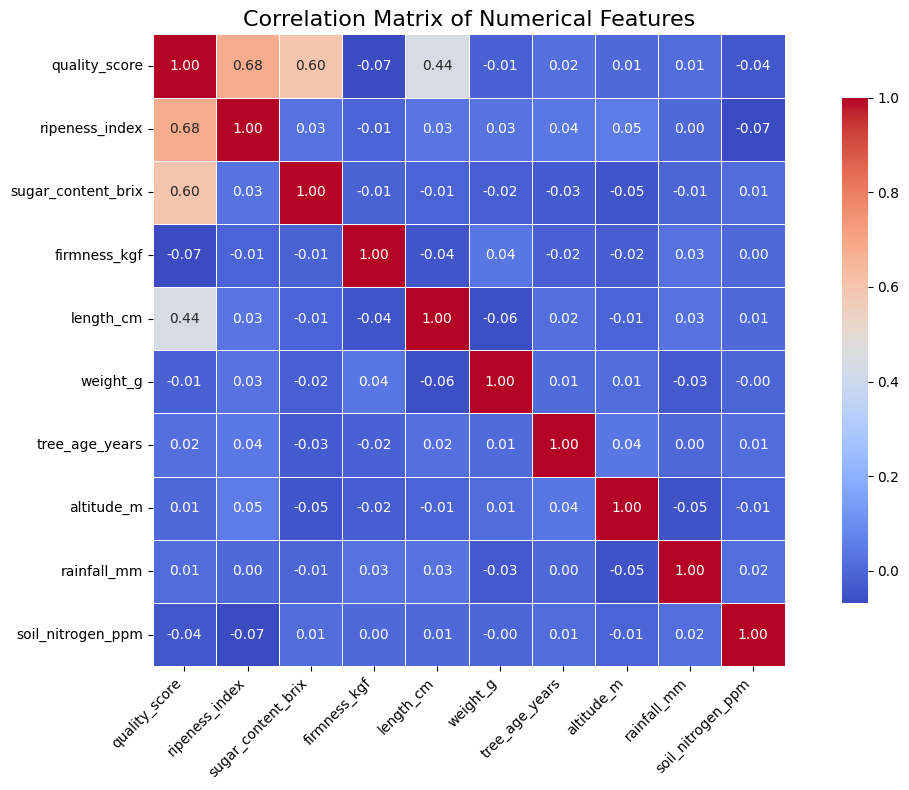

In [15]:

plt.figure(figsize=(12, 8))
sns.heatmap(
    df[num_cols].corr(), 
    annot=True, 
    cmap='coolwarm',  # Use a visually appealing colormap
    fmt='.2f', 
    linewidths=0.5,  # Add gridlines for clarity
    cbar_kws={'shrink': 0.8},  # Adjust the color bar size
    square=True  # Make heatmap cells square
)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()


**Inferences drawn from above heat map**
1. Decreasing order of correlation between variables --> ripeness_index -->quality_score > sugar_content_brix --> quality_score > quality_score -->length_cm
2. Quality_score is very much correlated with the length of the banana and is very important feature

# **4. Model Building**

In [16]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier,
    GradientBoostingClassifier, 
    ExtraTreesClassifier, 
    VotingClassifier, 
    BaggingClassifier
)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    classification_report, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    roc_curve
)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns


## **Preprocessing**

In [17]:
df = df.drop(columns= ['sample_id', 'harvest_date'])

## **LabelEncoding**

In [18]:
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

## **Train Test Split, scaling and smote**

In [19]:
x = df.drop('quality_category', axis=1)
y = df['quality_category']
x_train, x_test, y_train, y_test =train_test_split(x,y , random_state = 42, test_size= 0.2)
scaler = StandardScaler()
x = scaler.fit_transform(x)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Hyper-parameter optimization, cross validation and models evaluations and comparisons

Running Random Forest...
Best Parameters for Random Forest: {'max_depth': 20, 'n_estimators': 200}

Random Forest Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00       101
           3       1.00      1.00      1.00         7

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



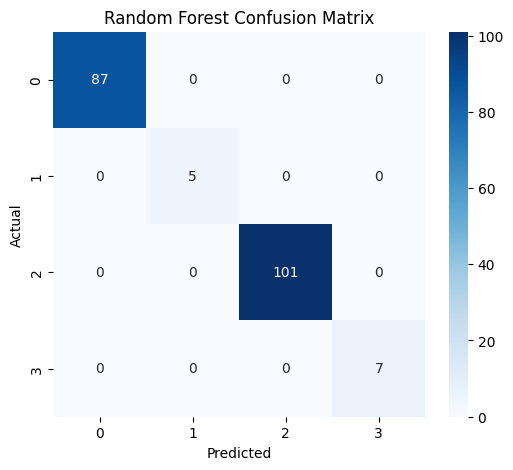

Running AdaBoost...
Best Parameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}

AdaBoost Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00       101
           3       1.00      1.00      1.00         7

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



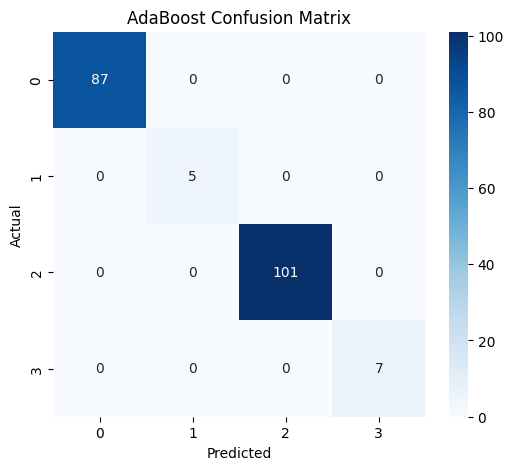

Running Gradient Boosting...
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Gradient Boosting Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00       101
           3       1.00      1.00      1.00         7

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



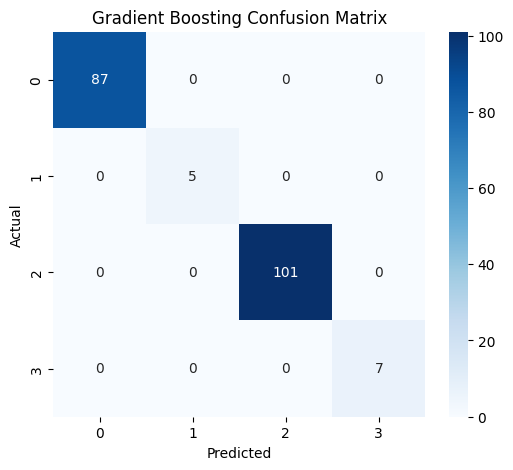

Running XGBoost...
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

XGBoost Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00       101
           3       1.00      1.00      1.00         7

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



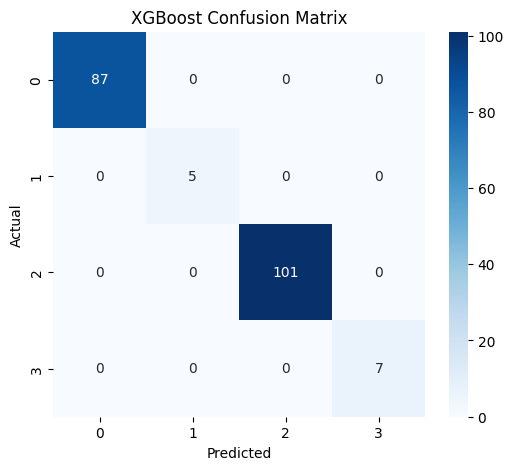

Running CatBoost...
Best Parameters for CatBoost: {'depth': 3, 'iterations': 100, 'learning_rate': 0.01}

CatBoost Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00       101
           3       1.00      1.00      1.00         7

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



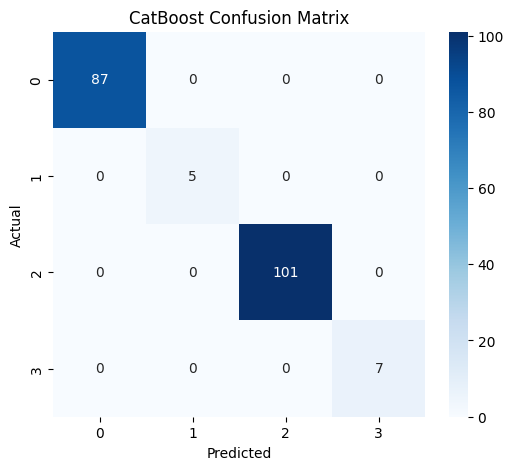

Running Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 5}

Decision Tree Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00       101
           3       1.00      1.00      1.00         7

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



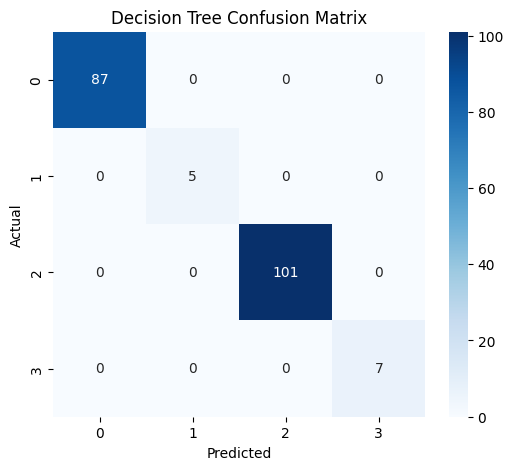

Running Logistic Regression...

Logistic Regression Metrics:
Accuracy: 0.5700
Precision: 0.6627
Recall: 0.5700
F1 Score: 0.6072

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.59      0.62        87
           1       0.05      0.20      0.08         5
           2       0.74      0.58      0.65       101
           3       0.13      0.43      0.20         7

    accuracy                           0.57       200
   macro avg       0.39      0.45      0.39       200
weighted avg       0.66      0.57      0.61       200



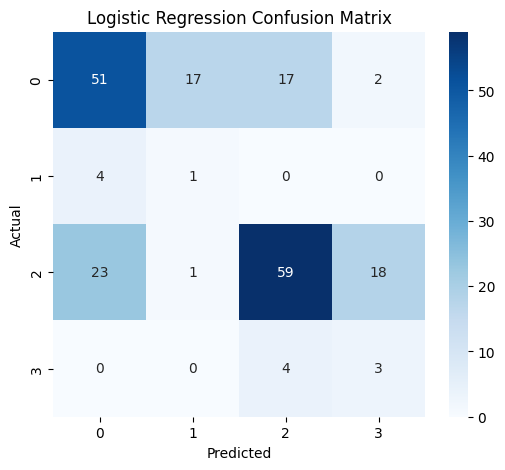

Running Gaussian Naive Bayes...

Gaussian Naive Bayes Metrics:
Accuracy: 0.9450
Precision: 0.9556
Recall: 0.9450
F1 Score: 0.9478

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        87
           1       0.83      1.00      0.91         5
           2       0.98      0.92      0.95       101
           3       0.58      1.00      0.74         7

    accuracy                           0.94       200
   macro avg       0.84      0.97      0.89       200
weighted avg       0.96      0.94      0.95       200



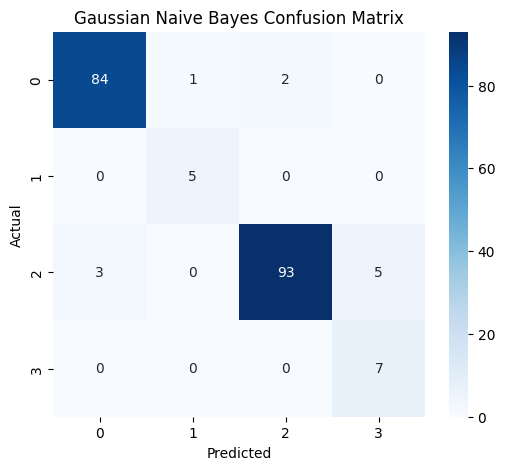

Running Linear Discriminant Analysis...

Linear Discriminant Analysis Metrics:
Accuracy: 0.8950
Precision: 0.9343
Recall: 0.8950
F1 Score: 0.9068

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        87
           1       0.50      1.00      0.67         5
           2       0.96      0.88      0.92       101
           3       0.41      1.00      0.58         7

    accuracy                           0.90       200
   macro avg       0.71      0.94      0.78       200
weighted avg       0.93      0.90      0.91       200



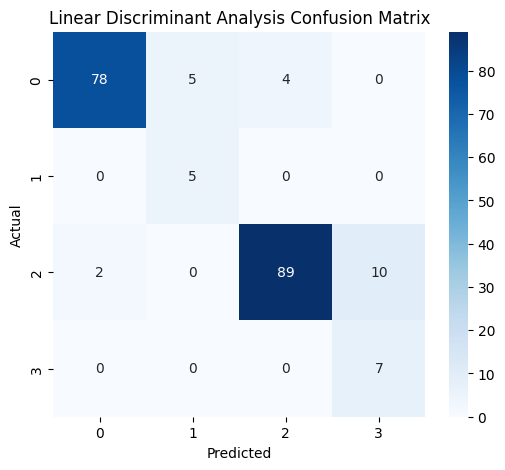

Running Extra Trees...

Extra Trees Metrics:
Accuracy: 0.9350
Precision: 0.9348
Recall: 0.9350
F1 Score: 0.9344

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        87
           1       1.00      0.80      0.89         5
           2       0.93      0.95      0.94       101
           3       0.83      0.71      0.77         7

    accuracy                           0.94       200
   macro avg       0.93      0.85      0.89       200
weighted avg       0.93      0.94      0.93       200



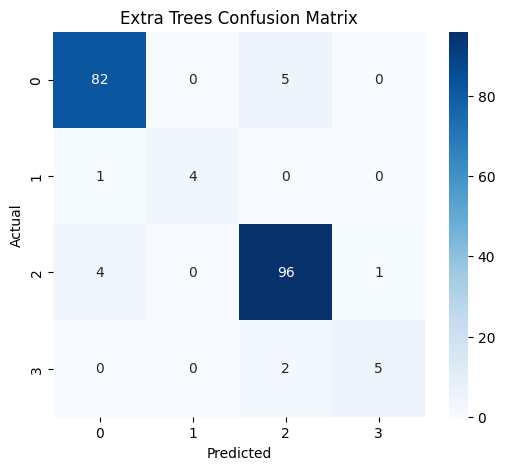

Running Bagging Classifier...

Bagging Classifier Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00       101
           3       1.00      1.00      1.00         7

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



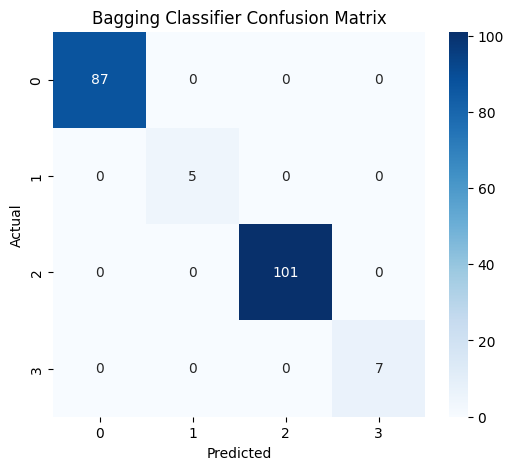


Voting Classifier Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00       101
           3       1.00      1.00      1.00         7

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



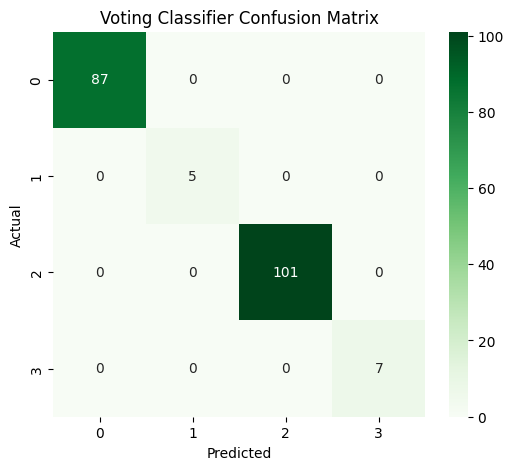


Model Performance Summary:
                           Model  Test Accuracy  Precision  Recall  F1 Score
0                  Random Forest          1.000   1.000000   1.000  1.000000
1                       AdaBoost          1.000   1.000000   1.000  1.000000
2              Gradient Boosting          1.000   1.000000   1.000  1.000000
3                        XGBoost          1.000   1.000000   1.000  1.000000
4                       CatBoost          1.000   1.000000   1.000  1.000000
5                  Decision Tree          1.000   1.000000   1.000  1.000000
6            Logistic Regression          0.570   0.662742   0.570  0.607219
7           Gaussian Naive Bayes          0.945   0.955618   0.945  0.947751
8   Linear Discriminant Analysis          0.895   0.934316   0.895  0.906781
9                    Extra Trees          0.935   0.934846   0.935  0.934439
10            Bagging Classifier          1.000   1.000000   1.000  1.000000


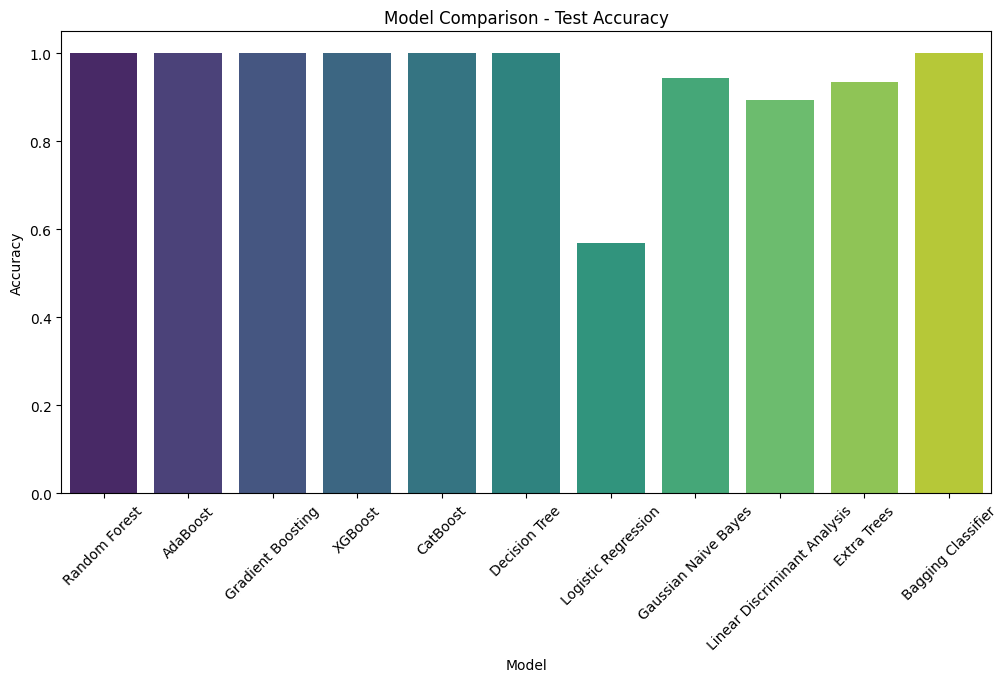

In [20]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Splitting the data
X = df.drop(columns=['quality_category'])  # Features
y = df['quality_category']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Perform SMOTE for class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# List of models
rfc = RandomForestClassifier(random_state=42)
abc = AdaBoostClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
catboost = CatBoostClassifier(random_state=42, verbose=0)
dtc = DecisionTreeClassifier(random_state=42)
log_reg = LogisticRegression(random_state=42, max_iter=1000)
gnb = GaussianNB()
lda = LDA()
extra_trees = ExtraTreesClassifier(random_state=42)
bagging = BaggingClassifier(random_state=42)

models = [
    rfc, abc, gbc, xgb, catboost, dtc, log_reg, gnb, lda, extra_trees, bagging
]

names = [
    "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost",
    "CatBoost", "Decision Tree", 
    "Logistic Regression", "Gaussian Naive Bayes", "Linear Discriminant Analysis",
    "Extra Trees", "Bagging Classifier"
]

# Hyperparameter grids for grid search
param_grids = {
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [10, 20, None]},
    "AdaBoost": {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1, 1]},
    "Gradient Boosting": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1], "max_depth": [3, 5]},
    "XGBoost": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1], "max_depth": [3, 5]},
    "CatBoost": {"iterations": [100, 200], "learning_rate": [0.01, 0.1], "depth": [3, 5]},
    "Decision Tree": {"max_depth": [5, 10, None]},
}

# Results storage
results = []

# Loop through models and perform Grid Search + Cross Validation
for name, model in zip(names, models):
    print(f"Running {name}...")
    
    if name in param_grids:  # If hyperparameter grid exists for this model
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=skf, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_smote, y_train_smote)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"Best Parameters for {name}: {best_params}")
    else:
        best_model = model
        best_model.fit(X_train_smote, y_train_smote)
    
    # Predict on test set
    y_pred = best_model.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    # Save results
    results.append({
        "Model": name,
        "Test Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })
    
    # Print results
    print(f"\n{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Voting Classifier Ensemble
voting_clf = VotingClassifier(
    estimators=[("Random Forest", rfc), ("AdaBoost", abc), ("Gradient Boosting", gbc), ("XGBoost", xgb), ("CatBoost", catboost)],
    voting='soft'
)
voting_clf.fit(X_train_smote, y_train_smote)
y_pred_voting = voting_clf.predict(X_test)

# Voting Classifier Metrics
accuracy = accuracy_score(y_test, y_pred_voting)
precision = precision_score(y_test, y_pred_voting, average='weighted')
recall = recall_score(y_test, y_pred_voting, average='weighted')
f1 = f1_score(y_test, y_pred_voting, average='weighted')
cm_voting = confusion_matrix(y_test, y_pred_voting)

print("\nVoting Classifier Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting))

# Confusion Matrix for Voting Classifier
plt.figure(figsize=(6, 5))
sns.heatmap(cm_voting, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Voting Classifier Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Results Summary
results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df)

# Visualize model performances
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Test Accuracy", data=results_df, palette="viridis")
plt.title("Model Comparison - Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()
